In [9]:
import os
import shutil
import random

In [19]:

# # Folder where your original 'cat', 'dog', and 'snack' folders are
# original_dataset_dir = r"C:\Users\vatha\Downloads\dataset\Animals"
# base_dir = r"C:\Users\vatha\Downloads\dataset\Split"  # Output directory

# # Your classes
# classes = ['cats', 'dogs', 'snakes']

# # Train, val, test split ratio
# split_ratio = [0.7, 0.15, 0.15]  # 70% train, 15% val, 15% test

# # Create folder structure
# for split in ['train', 'val', 'test']:
#     for class_name in classes:
#         os.makedirs(os.path.join(base_dir, split, class_name), exist_ok=True)

# # Split and copy files
# for class_name in classes:
#     class_dir = os.path.join(original_dataset_dir, class_name)
#     images = os.listdir(class_dir)
#     random.shuffle(images)

#     train_count = int(split_ratio[0] * len(images))
#     val_count = int(split_ratio[1] * len(images))

#     for i, img_name in enumerate(images):
#         src_path = os.path.join(class_dir, img_name)

#         if i < train_count:
#             dst_dir = os.path.join(base_dir, 'train', class_name)
#         elif i < train_count + val_count:
#             dst_dir = os.path.join(base_dir, 'val', class_name)
#         else:
#             dst_dir = os.path.join(base_dir, 'test', class_name)

#         shutil.copy2(src_path, dst_dir)

# print("✅ Dataset successfully split into train/val/test!")


In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [10]:
train_dir = r"C:\Users\vatha\Downloads\dataset\Split\train"
val_dir = r"C:\Users\vatha\Downloads\dataset\Split\val"
test_dir = r"C:\Users\vatha\Downloads\dataset\Split\test"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32


In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)


In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 2100 images belonging to 3 classes.
Found 450 images belonging to 3 classes.
Found 450 images belonging to 3 classes.


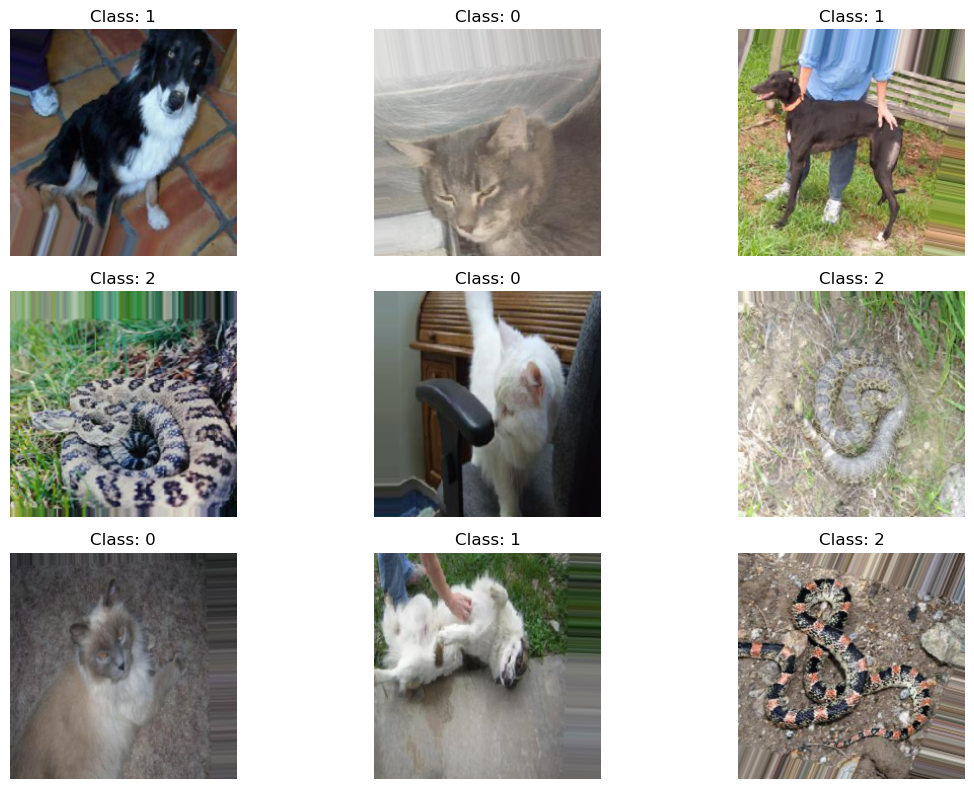

In [13]:
images, labels = next(train_generator)

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[i].argmax()}")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Get the number of classes from the generator
num_classes = train_generator.num_classes

# Build a simple CNN model
model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(num_classes, activation='softmax')  # For multi-class
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Show model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [17]:
# Train the model
history = model.fit(
    train_generator,
    epochs=1,
    validation_data=val_generator
)

66/66 [==============================] - 264s 4s/step - loss: 0.6063 - accuracy: 0.7219 - val_loss: 0.5907 - val_accuracy: 0.7378


In [18]:
model.save("model.h5")